# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city =citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#define units
units = "Metric"
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}units={units}&APPID={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    weather_response= requests.get(city_url)
    # Run an API request for each of the cities
    try:
    
        # Parse the JSON and retrieve data
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(weather_response.json)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | hadibu
Processing Record 4 of Set 1 | krasnozerskoye
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | korla
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | itamarandiba
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | bandarbeyla
Processing Record 11 of Set 1 | cockburn town
Processing Record 12 of Set 1 | yukhnov
Processing Record 13 of Set 1 | ust-nera
Processing Record 14 of Set 1 | kimbe
Processing Record 15 of Set 1 | kataragama
<bound method Response.json of <Response [404]>>
City not found. Skipping...
Processing Record 16 of Set 1 | talakan
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | taulaga
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | urzhar
Processing Record 21 o

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,15.46,83,14,6.26,NZ,1713926596
1,puerto natales,-51.7236,-72.4875,4.07,89,100,2.49,CL,1713926312
2,hadibu,12.6500,54.0333,27.49,73,4,1.16,YE,1713926597
3,krasnozerskoye,53.9828,79.2374,-2.02,51,76,7.40,RU,1713926597
4,ribeira grande,38.5167,-28.7000,15.99,82,100,6.71,PT,1713926489


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("Starter_Code/output_data/cities.csv",index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,15.46,83,14,6.26,NZ,1713926596
1,puerto natales,-51.7236,-72.4875,4.07,89,100,2.49,CL,1713926312
2,hadibu,12.6500,54.0333,27.49,73,4,1.16,YE,1713926597
3,krasnozerskoye,53.9828,79.2374,-2.02,51,76,7.40,RU,1713926597
4,ribeira grande,38.5167,-28.7000,15.99,82,100,6.71,PT,1713926489


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

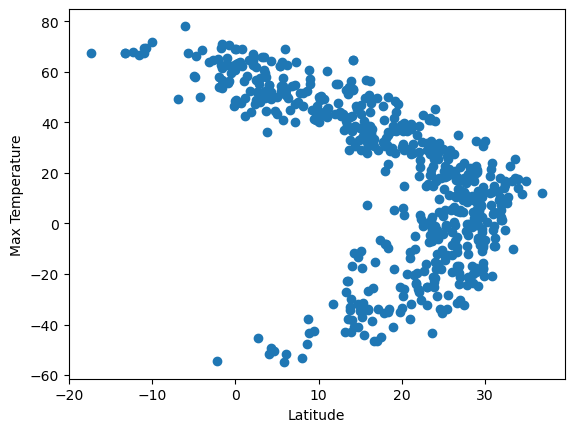

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
# Save the figure
plt.savefig("Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

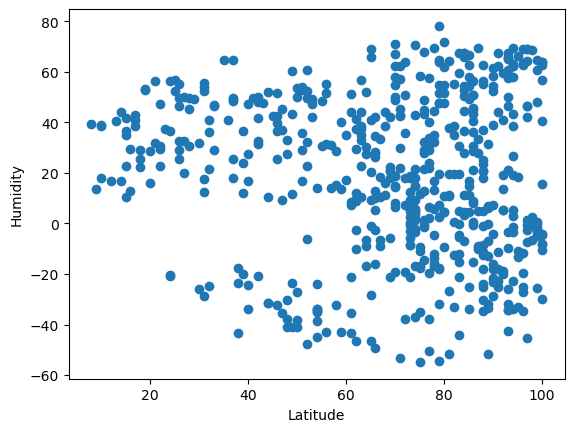

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Save the figure
plt.savefig("Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

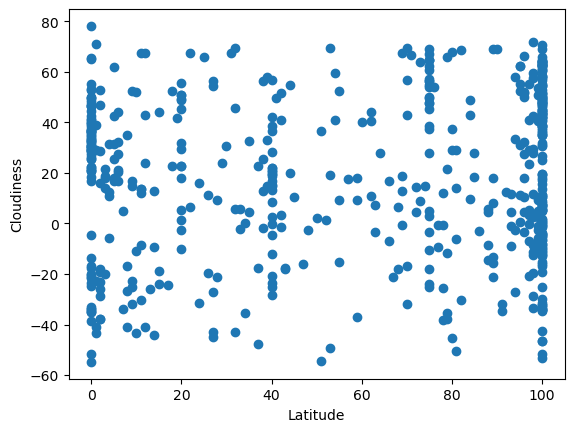

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

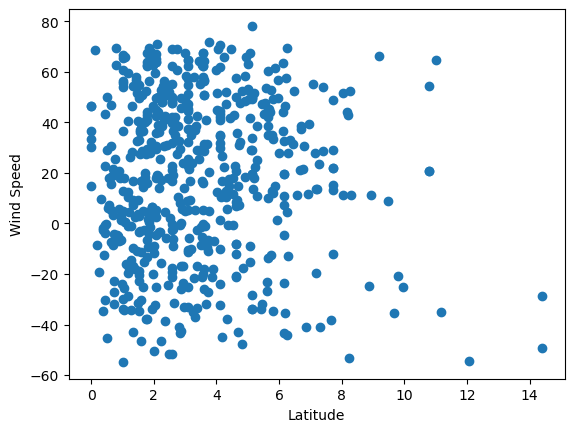

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")



# Save the figure
plt.savefig("Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = linregress(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hadibu,12.6500,54.0333,27.49,73,4,1.16,YE,1713926597
3,krasnozerskoye,53.9828,79.2374,-2.02,51,76,7.40,RU,1713926597
4,ribeira grande,38.5167,-28.7000,15.99,82,100,6.71,PT,1713926489
5,korla,41.7597,86.1469,23.37,15,19,5.07,CN,1713926495
6,albany,42.6001,-73.9662,12.72,46,98,3.39,US,1713926512


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,15.46,83,14,6.26,NZ,1713926596
1,puerto natales,-51.7236,-72.4875,4.07,89,100,2.49,CL,1713926312
7,itamarandiba,-17.8572,-42.8589,19.03,91,68,1.24,BR,1713926597
8,port-aux-francais,-49.3500,70.2167,4.32,66,53,14.40,TF,1713926490
13,kimbe,-5.5502,150.1429,31.20,69,99,3.11,PG,1713926597


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5154728926401799


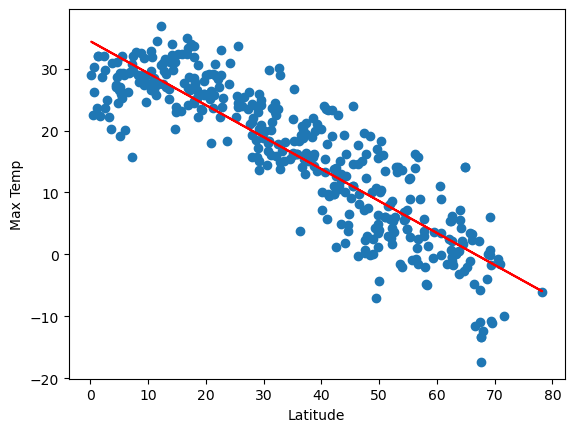

In [38]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.3374059754975394


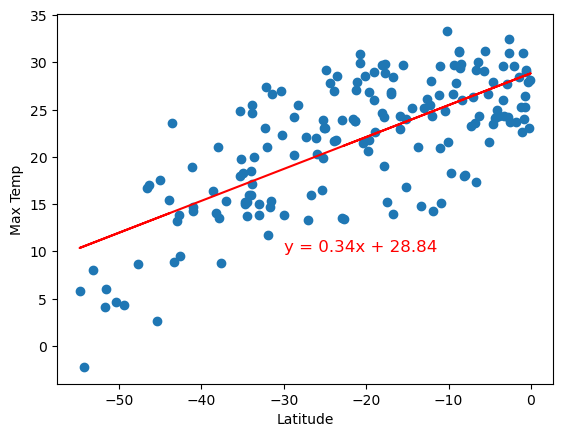

In [39]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 10))

r.-----------------------
Observations about linear relationship:The Northern Hemisphere shows a significant negative correlation (-0.5154) between temperature and latitude, indicating that as you move away from the equator towards the North Pole, temperatures tend to decrease s Conversely, in the Southern Hemisphere, there is a notable positive correlation (0.3374) between temperature and latitude, suggesting that temperatures generally increase as you move towards the equator from the South Pole.es.



### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05428134214730106


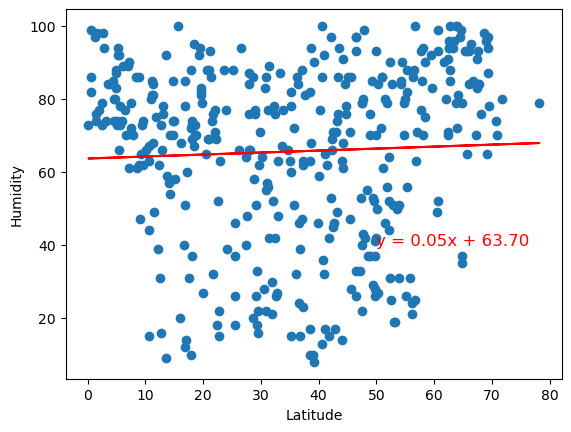

In [43]:
# Northern Hemisphere
# x_values = southern_hemi_df["Lat"]
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40)) 

The r-value is: 0.426766791305897


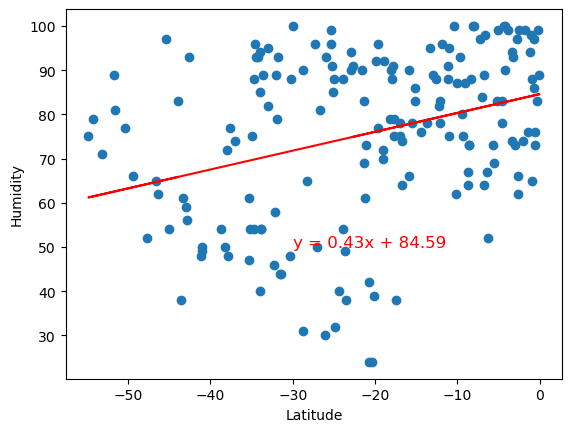

In [44]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-30, 50))

**Discussion about the linear relationship:** Regarding humidity, both hemispheres exhibit a relatively strong positive correlation with latitude. In the Northern Hemisphere, the correlation coefficient is 0.05428, indicating that humidity tends to increase as you move away from the equator. Similarly, in the Southern Hemisphere, the correlation coefficient is 0.4267, indicating that humidity also tends to increase as you move toward the equator.
r.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.19695224320655172


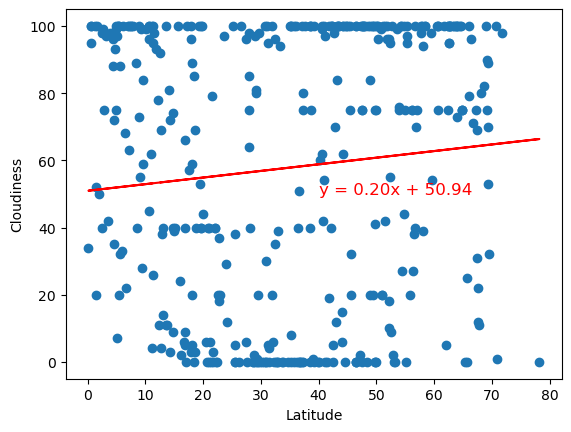

In [45]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (40, 50))


The r-value is: 0.7942317577960107


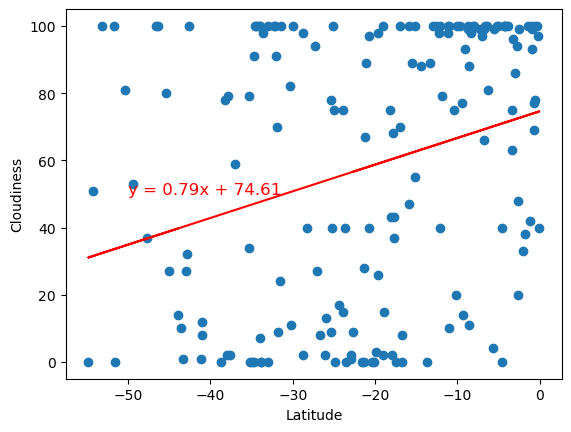

In [48]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

**Discussion about the linear relationship:** For cloudiness, there is a weak positive correlation in the Northern Hemisphere (correlation coefficient of 0.1969), suggesting a slight increase in cloudiness as you move away from the equator. In the Southern Hemisphere, however, there is a relatively strong positive correlation (correlation coefficient of 0.7942), indicating a more pronounced increase in cloudiness towards the equator..

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.002082751815980311


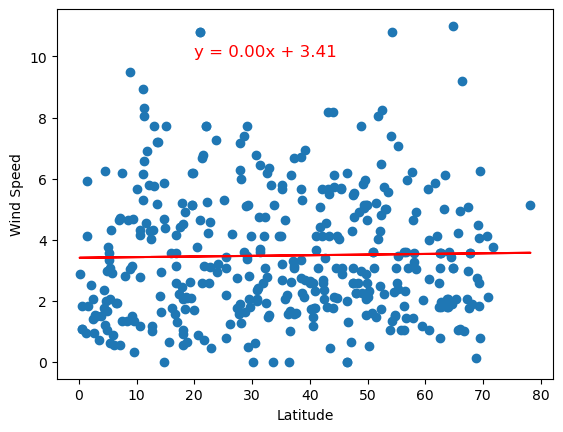

In [53]:

# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (20, 10))


The r-value is: -0.05129521606213174


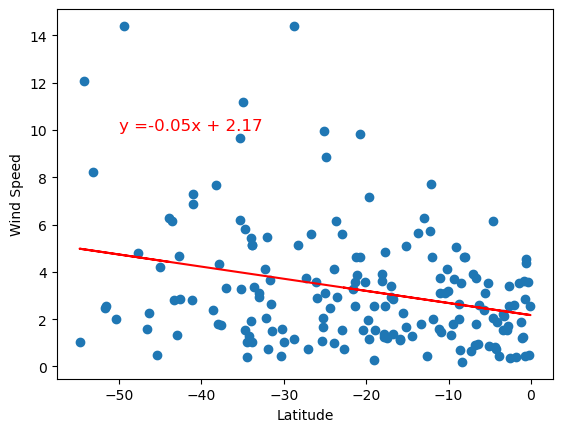

In [54]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 10))

**Discussion about the linear relationship:** Lastly, wind speed shows little to no correlation with latitude in the Northern Hemisphere (correlation coefficient of 0.0020), suggesting that wind speed does not significantly change with latitude. In the Southern Hemisphere, there is a weak negative correlation (correlation coefficient of -0.0512), indicating a slight decrease in wind speed as you move towards the equator.